Predictive Maintenance task with the adoption of a Deep Learning architecture to deal with a high-frequency sequence of data which we preprocessed with Spectrograms. This step enables us to adopt a particular neural network structure, note as Convolution Recurrent Neural Network (CRNN), which learns at the same time from the spatial and recurrent structure of our data.

# Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import random
import os

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *

# THE DATASET

We can image to have a hydraulic pipe system which cyclically receives impulse due to e.g. the transition of particular type of liquid in the pipeline. This phenomenon lasts 60 seconds and was measured by different sensors (Sensor Physical quantity Unit Sampling rate, PS1 Pressure bar, PS2 Pressure bar, PS3 Pressure bar, PS4 Pressure bar, PS5 Pressure bar, PS6 Pressure bar, EPS1 Motor power, FS1 Volume flow, FS2 Volume flow, TS1 Temperature, TS2 Temperature, TS3 Temperature, TS4 Temperature, VS1 Vibration, CE Cooling efficiency, CP Cooling power, SE Efficiency factor) with different Hz frequencies.

Our purpose is to predict the condition of four hydraulic components which compose the pipeline. These target condition values are annotated in the form of integer values (easy to encode) and say us if a particular component is close to fail for every cycle.

In [2]:
label = pd.read_csv(f'E:\gitlab\machine-learning\dataset\profile.txt', sep='\t', header=None)
label.columns = ['Cooler','Valve','Pump','Accumulator','Flag']

data = [f'E:\gitlab\machine-learning\dataset\TS1.txt',f'E:\gitlab\machine-learning\dataset\TS2.txt',f'E:\gitlab\machine-learning\dataset\TS3.txt',f'E:\gitlab\machine-learning\dataset\TS4.txt']
# data = [f'E:\gitlab\machine-learning\dataset\TS1.txt']
df = pd.DataFrame()

for txt in data:
    read_df = pd.read_csv(txt, sep='\t', header=None)
    df = df.append(read_df)    

print(df.shape)
df.head()

(8820, 60)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,35.570,35.492,35.469,35.422,35.414,35.320,35.227,35.242,35.160,35.176,...,36.008,35.984,35.996,36.039,36.008,36.008,36.094,36.102,36.090,36.152
1,36.156,36.094,35.992,36.008,35.992,35.902,35.824,35.820,35.727,35.727,...,37.328,37.324,37.340,37.332,37.316,37.410,37.418,37.422,37.488,37.477
2,37.488,37.391,37.340,37.312,37.223,37.145,37.059,36.973,36.898,36.879,...,38.457,38.461,38.457,38.469,38.469,38.555,38.527,38.543,38.527,38.621
3,38.633,38.535,38.469,38.379,38.297,38.223,38.125,38.062,37.977,37.969,...,39.441,39.363,39.367,39.457,39.461,39.461,39.473,39.441,39.453,39.461
4,39.461,39.461,39.375,39.281,39.203,39.113,39.043,38.969,38.875,38.883,...,40.324,40.320,40.312,40.340,40.320,40.387,40.391,40.391,40.387,40.391


# RESHAPE DATA AMONG SENSORS

In [3]:
df = df.sort_index().values.reshape(-1,len(data),len(df.columns)).transpose(0,2,1)
df.shape

(2205, 60, 4)

saperate to become 4 again

# PLOT ORIGINAL PRESSURE DATA

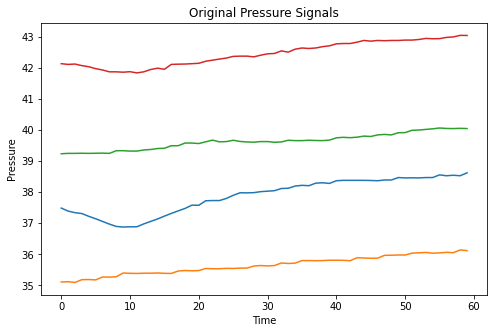

In [4]:
plt.figure(figsize=(8,5))
plt.plot(df[2])
plt.title('Original Pressure Signals')
plt.ylabel('Pressure'); plt.xlabel('Time')
np.set_printoptions(False)